<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def stackedBarCategories (rpt_name):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()

  sheets = ["RD Cats", "Hist Days of Week(non-Adj)"]

  for sheet in sheets:

    cats_df = pd.read_excel(rpt_name, sheet_name=sheet)  

    if sheet=="Hist Days of Week(non-Adj)":
      cats_df = cats_df[['ART','SLP','ORD','LES','TRA','Rel','Ref','PHA','SPC']]
    else:
      cats_df["ART"] = cats_df.ART.rolling(7, min_periods=7).mean()
      cats_df["SLP"] = cats_df.SLP.rolling(7, min_periods=7).mean()
      cats_df["ORD"] = cats_df.ORD.rolling(7, min_periods=7).mean()
      cats_df["LES"] = cats_df.LES.rolling(7, min_periods=7).mean()
      cats_df["TRA"] = cats_df.TRA.rolling(7, min_periods=7).mean()
      cats_df["Rel"] = cats_df.Rel.rolling(7, min_periods=7).mean()
      cats_df["Ref"] = cats_df.Ref.rolling(7, min_periods=7).mean()
      cats_df["PHA"] = cats_df.PHA.rolling(7, min_periods=7).mean()
      cats_df["SPC"] = cats_df.SPC.rolling(7, min_periods=7).mean()
      cats_df = cats_df.tail(21)

      cats_df.reset_index(inplace=True)
      cats_df.index = cats_df.index + 1

      cats_df2 = cats_df[['Date','Day','ORD','TRA','SPC','LES','SLP']]
      print()
      print(cats_df2.tail(7))

      cats_df1 = cats_df[['Date','Day','ART','Rel','Ref','PHA']]

      cats_df1["Pos_Sum"] = cats_df1.iloc[:, -4:-1].sum(axis=1)


      # df.apply(lambda row: row['a' : 'c'].sum(),axis=1)1
      print()
      print(cats_df1.tail(7))

    tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["Rel"])]
    tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["Ref"])]
    tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["PHA"])]
    tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["ORD"])]
    tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["TRA"])]
    tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["SPC"])]
    tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["LES"])]


    f, ax = plt.subplots(1, figsize=(12,5))
    bar_l = [i+1 for i in range(len(cats_df['ART']))]
    ax.bar(bar_l, cats_df["ART"], label="ART", color="olive")
    ax.bar(bar_l, cats_df["Rel"], label="Rel", color="purple", bottom=cats_df["ART"])
    ax.bar(bar_l, cats_df["Ref"], label="Ref", color="pink", bottom=tmp_2)
    ax.bar(bar_l, cats_df["PHA"], label="PHA", color="cyan", bottom=tmp_3)
    ax.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_4)
    ax.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_5)
    ax.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_6)
    ax.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_7)
    ax.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=tmp_8)


    ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
    print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201125_0110.xlsx to Routine_rpts_20201125_0110 (11).xlsx

          Date  Day         ORD        TRA        SPC         LES         SLP
15  11/18/2020  WED  313.285714  34.285714  30.714286  167.857143  375.142857
16  11/19/2020  THU  314.571429  35.571429  28.000000  215.571429  353.285714
17  11/20/2020  FRI  327.571429  48.714286  21.714286  208.285714  358.142857
18  11/21/2020  SAT  338.428571  48.714286  21.714286  209.428571  346.714286
19  11/22/2020  SUN  331.428571  47.285714  21.714286  211.428571  344.428571
20  11/23/2020  MON  326.714286  37.285714  26.857143  171.714286  343.714286
21  11/24/2020  TUE  331.714286  42.571429  21.857143  152.428571  358.285714

          Date  Day         ART        Rel        Ref        PHA     Pos_Sum
15  11/18/2020  WED  423.000000  25.714286  34.571429  35.428571  483.285714
16  11/19/2020  THU  403.142857  28.857143  34.285714  26.714286  466.285714
17  11/20/2020  FRI  380.428571  31.428571  35.000000  28.714286

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


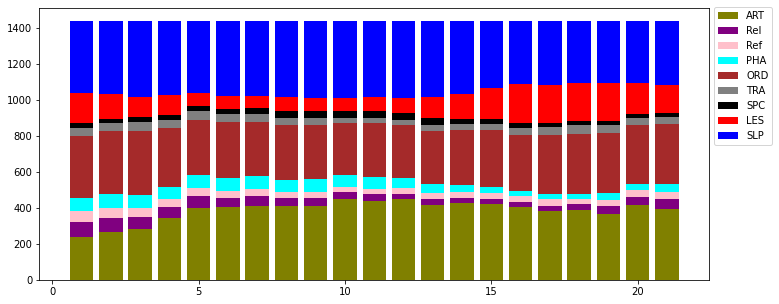

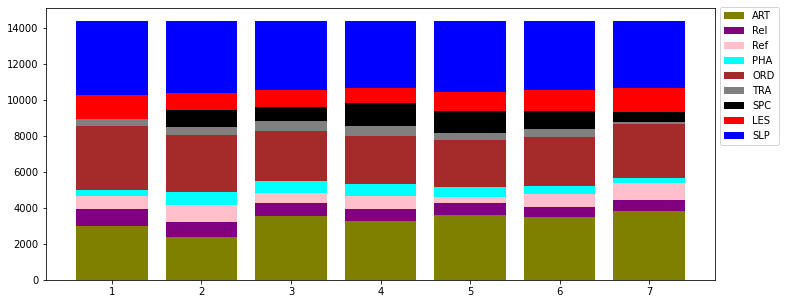

In [25]:
rpt_name ="Routine_rpts_20201125_0110.xlsx"
stackedBarCategories(rpt_name)